## Modelo predictivo de precios de casas. 

### Grafica de precios. 

<img src="img/diagrama17_c2.png" height="600px" width="400px" />

## **Guia para proyectos de aprendizaje automático.**

Hay ocho pasos principales:

1. Enmarcar el problema y ver el panorama general.
2. Obtener los datos.
3. Explorar los datos para obtener información.
4. Preparar los datos para exponer mejor los patrones de datos subyacentes a algoritmos de aprendizaje automático.
5. Explorar muchos modelos diferentes y preseleccionar los mejores.
6. Afinar los modelos y combinarlos en una gran solución.
7. Presente su solución.
8. Poner en marcha, supervisar y mantener el sistema.

Evidentemente, no dude en adaptar esta lista de comprobación a sus necesidades.


# 1.Enmarcar el problema y ver el panorama general

Sub- tareas: 
1. Defina el objetivo en términos empresariales.
2. ¿Cómo se utilizará su solución?(dara una idea de que tan presicio hay que ser)
3. ¿Cuáles son las soluciones/respuestas actuales (si las hay)?(dara una idea del rendimiento/presición actual y como se podrias agregar valor a tu trabajo)
4. ¿Cómo debería enmarcar este problema (supervisado/no supervisado, online/fuera de línea, etc.)?
5. ¿Cómo debe medirse el rendimiento?
6. ¿Está la medida del rendimiento esta alineada con el objetivo de la empresa?
7. ¿Cuál sería el rendimiento mínimo necesario para alcanzar el objetivo empresarial?
8. ¿Cuáles son los problemas comparables? ¿Se puede reutilizar la experiencia o las herramientas?
9. ¿Se dispone de conocimientos humanos?
10. ¿Cómo se resolvería el problema manualmente?
11. Enumere las suposiciones que usted (u otros) han hecho hasta ahora.
12. Verifique las suposiciones si es posible.


##### Pipeline.

El concepto de pipeline es muy comun en el contexto de ML y se le asigna al una secuencia de componentes de procesamiento de datos. Cada componente toma y devuelve datos procesador y son autonomos entre ellos tal que permite su facil entendimiento (con la ayuda de un gráfico de flujo de datos), y que diferentes equipos puedan centrarse en diferentes componentes. Ademas, esta forma de procesar los datos permite que si uno de los componentes se estropea pueda ser arreglado mientras los componentes posteriores pueden seguir funcionando con normalidad (al menos durante un tiempo) utilizando simplemente la última salida del componente estropeado. Esta es la gran ventaja de los pipelines, su robustez.Por otro lado, un componente roto puede pasar desapercibido durante algún tiempo si no se realiza una supervisión adecuada. Los datos se vuelven obsoletos y el rendimiento general del sistema disminuye.

<img src="img/diagrama18_c2.png" height="600px" width="400px" />

##### Clasificacion de problema: 

* Aprendizaje supervisado: ya que se dan ejemplos de entrenamiento etiquetados (cada instancia viene con el resultado esperado, es decir, el precio medio de la vivienda en el distrito).

* Regresión típica: ya que se le pide que prediga un valor. Más concretamente, se trata de un problema de regresión múltiple, ya que el sistema utilizará múltiples características para realizar una predicción (utilizará la población del distrito, la renta media, etc.). 

* Regresión univariante: ya que sólo intentamos predecir un único valor para cada distrito. Si tratáramos de predecir múltiples valores por distrito, sería un problema de regresión multivariante. 

* Aprendizaje por lotes: ya que no hay un flujo continuo de datos que entren en el sistema, no hay ninguna necesidad particular de ajustarse a los datos cambiantes rápidamente, y los datos son lo suficientemente pequeños como para caber en la memoria.


**Tip**|
:----------------------------:|
Si los datos fueran enormes, se podría dividir el trabajo de aprendizaje por lotes en varios servidores (utilizando la técnica MapReduce) o utilizar una técnica de aprendizaje en línea.



##### Seleccione una medida de rendimiento.

Una medida de rendimiento típica para los problemas de regresión es el error cuadrático medio (RMSE).

$$\operatorname{RMSE}(\mathbf{X}, h)=\sqrt{\frac{1}{m} \sum_{i=1}^{m}\left(h\left(\mathbf{x}^{(i)}\right)-y^{(i)}\right)^{2}}$$

Donde: 
* $m =$ número de instancias del conjunto de datos.
* $\mathbf{x}^{(i)}$ es un vector de todos los valores de características.
* $y^{(i)}$ es su etiqueta (el valor de salida deseado para esa instancia $i$).
* $h$ es la función de predicción de su sistema, también llamada hipótesis.

Ejemplo: si la primera instancia de datos está situado en la longitud -118,29°, latitud 33,91°, y tiene 1.416 habitantes con una renta media de 38.372, y el valor medio de la vivienda es de 156.400. 
$$
\begin{align*}
\mathbf{x}^{(1)}&=\begin{pmatrix} −118.29\\ 33.91 \\1,416\\38,372 \end{pmatrix} &
\mathbf{y}^{(1)}&=156.400
\end{align*}
$$
$\mathbf{X}$ es una matriz que contiene todos los valores de las características de todas las instancias del conjunto de datos. Hay una fila por instancia, y la fila $i^{th}$ es igual a la transposición de $\mathbf{x}^{(i)}$.
Ejemplo:  
$$
\begin{align*}
\mathbf{X}=\begin{pmatrix} 
(\mathbf{x}^{(1)})^{T}\\ 
(\mathbf{x}^{(2)})^{T} 
\\.\\.\\.\\
(\mathbf{x}^{(1999)})^{T}\\
(\mathbf{x}^{(2000)})^{T} \end{pmatrix} =\begin{pmatrix}
−118.29 & 33.91 & 1,416 & 38,37 \\
. & . & . & . \\
. & . & . & .
\end{pmatrix}
\end{align*}
$$

El RMSE es generalmente la medida de rendimiento preferida para las tareas de regresión, en algunos contextos puede preferir utilizar otra función. Por ejemplo, suponga que hay muchos instancias atípicas. En ese caso, puede considerar el uso del error medio absoluto (MAE):
$$\operatorname{MAE}(\mathbf{X}, h)= \frac{1}{m} \sum_{i=1}^{m} \left|h\left(\mathbf{x}^{(i)}\right)-y^{(i)} \right| $$

Más generalmente, la norma $ℓ_{k}$ de un vector $\mathbf{v}$ que contiene $n$ elementos se define como $\left|\left| v \right|\right|_{k} = (\left|v_{0}\right|^{k} + \left|v_{1}\right|^{k} + ⋯ + \left|v_{2}\right|^{k})^{\frac{1}{k}}$. $ℓ_0$ da el número de elementos no nulos en el vector, y $ℓ_{ \infty}$ da el valor absoluto máximo en el vector.

**Tip**|
:----------------------------:|
Cuanto más alto sea el índice de la norma, más se centra en los valores grandes y descuida los pequeños. Por eso el RMSE es más sensible a los a los valores atípicos que el MAE. Pero cuando los valores atípicos son exponencialmente raros (como en una curva en forma de campana), el RMSE funciona muy bien y es generalmente se prefiere.

##### Compruebe los supuestos:

Es una muy buena práctica enumerar y verificar los supuestos que se han que se han hecho hasta ahora (por ti o por otros); esto ayuda a detectar problemas graves desde el principio. Por ejemplo, imagine que sus predicciones de precio alimentaran otro algoritmo pero este ultimo transforma los datos de precio a categorias (por ejemplo, "barato", "medio" o "caro") y luego utiliza esas categorías en lugar de los  precios.  En este caso no es importante que el precio sea perfecto, sino que el sistema sólo debe que la categoría sea la correcta. Si es así, el **problema debería haberse planteado como una tarea de  clasificación y no de regresión**. No querrá descubrir después de haber trabajado durante meses en un sistema de regresión.
Quedemonos en el caso que necesitamos objetener solamente los precios de cada instancia. 

# 2. Obtenga los datos
Los datos se encuentran en https://github.com/ageron/handson-ml2.

##### Creamos nuestro espacio de trabajo. 
Se puede crea un ambiente virtual instalando virtualenv o anaconda, como sea más comodo para el usuario. Este paso es super importante para registrar cada libreria ocupada, y asi poder replicar los resultados sin inconvenientes. 
Los modulos que se ocuparan seran Jupyter, NumPy, pandas,Matplotlib, y Scikit-Learn. 

Para instalar virtualen ejecutar el siguiente comando: 
**python3 -m pip install --user -U virtualenv**

Cree una carpeta para guardar el proyecto y los modulos ocupados: 


<code>
    $ export ML_PATH="$HOME/ml" # You can change the path if you prefer
    $ mkdir -p $ML_PATH 
    $ cd $ML_PATH
    $ virtualenv my_env(reemplazar por nombre del ambiente)
    $ cd $ML_PATH
    $ source my_env/bin/activate # on Linux or macOS
    $ .\my_env\Scripts\activate # on Windows
    #despues solo hay que instalar las librerias con pip install 

Despues de instalar las librerias corremos el comando de >>jupyter notebook para abrirlo.

##### Descarga de datos. 
En entornos típicos, sus datos estarían disponibles en una base de datos relacional (o algún otro almacén de datos común) y repartidos en múltiples tablas/documentos/archivos. Para acceder a ellos, primero tendría que obtener sus credenciales y autorizaciones de acceso y familiarizarse con el esquema de datos de datos.

En este caso solo tenemos que descargar los datos housing.tgz, que contiene un archivo de valores separados por comas (CSV) llamado housing.csv con todos los datos. Es conveniente desarrollar una funcion que me permita automatizar el proceso de descarga de datos. 

In [1]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handsonml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

    
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [2]:
housing = load_housing_data()

In [3]:
#Cada fila representa una instancia.
#el dataframe tiene 10 features.
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**ojo que cada instancia representa una zona con varias casas** 

El método **info()** es útil para obtener una descripción rápida de los datos, en en particular el número total de filas, el tipo de cada atributo y el número de valores no nulos.

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Hay 20,640 instancias, un dataset bastante pequeño para ML. Podemos apreciar que en en la categoria de total de piezas 207 instancias son nulas por lo que hay que decidir que hacer con esos datos faltantes lo cual se vera mas adelante. 

Solo la categoria de proximidad ocenica tiene valores diferentes a numero, al aplicar la funcion head() podemos ver que esta variable esta descrita por categorias, podemos ejecutar el comando de value_counts() para saber cuantos categorias y su cantidad de repeticiones existen. 

In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Un percentil indica el valor por debajo del cual cae un determinado porcentaje de observaciones en un grupo de observaciones. Por ejemplo, el 25% de los distritos tiene una edad media de la vivienda inferior a 18, mientras que el 50% es inferior a 29 y el 75% es inferior a 37. A menudo se denominan percentil 25 (o primer cuartil), mediana y percentil 75 (o tercer cuartil).

Otra manera de hacer un analisis exploratorio de los datos es realizando un histograma para cada categoria con el comando hist().



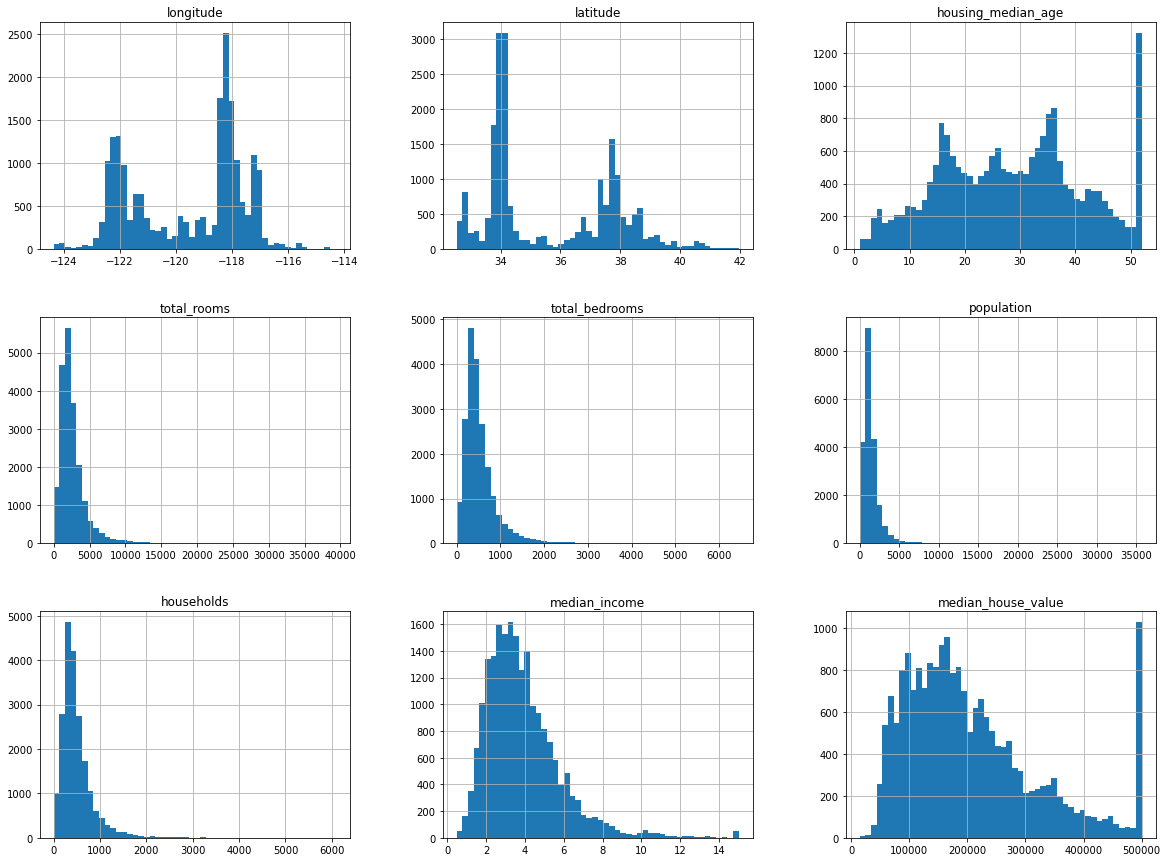

In [7]:
%matplotlib inline 

import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()


Hay algunas cosas que puede notar en estos histogramas:
1. El atributo de la renta media no parece estar expresado en dólares estadounidenses (USD) estan escalados por 1/10.000.
2. Se ve que en las variables housing_median_age y en median_house_value se acumularon los datos en el valor final(cortaron los datos) en estos casos se debe consultar con tu equipo de clientes para ver si esto es un problema o no. En caso de que sean necesarias predicciones más allá de 500.000, entonces tiene dos opciones: 
     1. Recoger las etiquetas adecuadas para las instancias cuyas etiquetas fueron limitadas. 
     2. Eliminar esos distritos del conjunto de entrenamiento (y también del conjunto de prueba, ya que su sistema no debería ser evaluado de forma deficiente si predice valores más allá de 500.000).
3. Estos atributos tienen escalas muy diferentes. 
4. Por último, muchos histogramas tienen una cola pesada: se extienden mucho más a la derecha de la mediana que a la izquierda. Esto puede dificultar un poco la detección de patrones por parte de algunos algoritmos de aprendizaje automático. Más adelante intentaremos transformar estos atributos para tener distribuciones más acampanadas. 

Antes de seguir mirando los datos, hay que crear un conjunto de pruebas, **dejarlo a un lado!!** 

### Creación de datos de prueba. 

**Es muy importante que no veas los datos de prueba.** 

El cerebro es un sistema de detección de patrones increíble, es muy propenso a la **sobreadaptación**: si miras el conjunto de pruebas, puedes tropezar con algún patrón aparentemente interesante en los datos de prueba que te lleve a seleccionar un tipo particular de modelo de aprendizaje automático. Cuando estimes el error de generalización utilizando el conjunto de pruebas, tu estimación será demasiado optimista y lanzarás un sistema que no funcionará tan bien como se esperaba. A esto se le llama **sesgo de fisgoneo de datos**.

In [8]:
import numpy as np
np.random.seed(42)
#test_ratio % de datos de prueba que quiero tener 
#para dataset pequeños 20% del conjunto de datos o mas 
#dataset grandes puede ser menos del 20%
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)

Hay que considera que si repetimos muchas veces esta funcion de split podriamos concurrir al siguiente error: al ser un split random en algun momento vamos a tenerminar viendo (tanto el algoritmo como uno mismo) todos los datos y podremos sufrir el **sesgo de fisgoneo de datos**. 

Una solución a este problema es guardar la semilla con la que se hacen las permutaciones con
np.random.seed(42).El problema de esto es si los datos se actualizan. 

Asumiendo que cada instacia queda inmutable, independiente de que se agregen más valores al set, podemos utilizar un identificador de cada instancia para decidir si se va al set de prueba. asi el nuevo conjunto de prueba contendrá el 20% de las nuevas instancias, pero no contendrá ninguna instancia que estuviera previamente en el conjunto de entrenamiento.

In [9]:
from zlib import crc32


def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


* Explicación primera función:(No la entendi) 

https://stackoverflow.com/questions/50646890/how-does-the-crc32-function-work-when-using-sampling-data
https://datascience.stackexchange.com/questions/51348/splitting-train-test-sets-by-an-identifier
https://github.com/ageron/handson-ml/issues/71
https://www.reddit.com/r/learnpython/comments/ep0nrr/problem_understanding_code_from_hands_on_machine/

* Explicación de la segunda funcion:(la entendi a medias)

https://stackoverflow.com/questions/56131099/meaning-and-implementation-of-locvalue
https://www.reddit.com/r/learnpython/comments/cldabq/having_trouble_using_python_in_data_science_to/

La solución más sencilla crear un indice y utilizarlo como identificador:

In [78]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index") 

Hay que asegurarse de que los nuevos datos se añaden al final del conjunto de datos y de que nunca se borra ninguna fila. Si esto no es posible, puede intentar utilizar las características del set para construir un identificador único. Por ejemplo, convinar la latitud y longitud de una instancia. 

In [ ]:
#no se porque lo multiplica por 1000???
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

Scikit-Learn tiene funciones para dividir los set con train_test_split(), tiene con un par de características adicionales. En primer lugar, el  parámetro random_state que permite establecer la semilla del generador aleatorio. En segundo lugar, puede pasarle múltiples conjuntos de datos con un número idéntico de filas, y los dividirá en los mismos índices (esto es muy útil, por ejemplo, si tiene un DataFrame separado para las etiquetas):

In [100]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

Estos metodos de division de set solo funcionan con set grades, cuando son set pequeños se tiene una alta probailidad de introducir sesgo en la division de los set.Cuando una empresa de encuestas decide llamar a 1.000 personas para hacerles unas cuantas preguntas, no elige a 1.000 personas al azar en una guía telefónica. Intentan asegurarse de que esas 1.000 personas sean representativas de toda la población. Por ejemplo, la población de EE.UU. tiene un 51,3% de mujeres y un 48,7% de hombres, por lo que una encuesta bien realizada en EE.UU. trataría de mantener esta proporción en la muestra: 513 mujeres y 487 hombres. Esto se llama **muestreo estratificado**: la población se divide en subgrupos homogéneos llamados estratos.

Considando que la categoria median_income es un atributo muy importante para predecir los precios y queremos hacer una separacion de datos con el menor sesgo posible podemos analizar la distribucion de renta media en un numero de intervalos razonable. Para hacer estos intevalos podemos ocupar la funcion cut() de pandas y especicalor los intervalos. 

<AxesSubplot:>

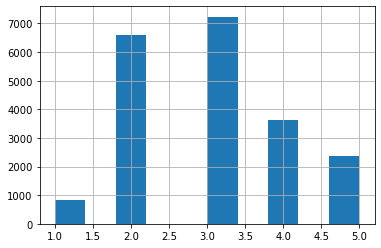

In [95]:
#la set queda mejor dividido en 5 que en 6 partes.
housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
                                labels=[1, 2, 3, 4, 5])
"""
label-1= 0 < 1.5
label-2= 1.5 < 3
label-3= 3 < 4.5
label-4= 4.5 < 6
label-5= 6 < inf
"""

housing["income_cat"].hist()

In [107]:
info_tot = housing["income_cat"].value_counts() / len(housing["income_cat"])

La mayoría de los valores de la mediana de los ingresos se agrupan en torno a 1,5 a 6, pero algunas medianas de los ingresos van mucho más allá de 6. Es importante tener un número suficiente de casos en su conjunto de datos para cada estrato, o de lo contrario la estimación de la importancia de un estrato puede estar sesgada.

Ahora está listo para hacer un muestreo estratificado basado en la categoría de ingresos. Para ello puedes utilizar la clase StratifiedShuffleSplit de Scikit-Learn:

In [96]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    


In [104]:
infotrain =  strat_train_set["income_cat"].value_counts() / len(strat_train_set)
infotest = strat_test_set["income_cat"].value_counts() / len(strat_test_set)

In [146]:
print(infotrain)
#print(infotest)
#print(info_tot)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64


Ahora debe eliminar el atributo income_cat para que los datos vuelvan a su estado original:

In [109]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

La generación de conjuntos de pruebas **demasiado importante** de un proyecto de aprendizaje automático por eso es bueno dedicar un tiempo razonable a pensar cual es la mejor manera de hacerlo. 

# 3. Descubra y visualice los datos para obtener Insights.

El objetivo de esta parte es profundizar un poco más en los datos.En primer lugar, asegúrate de que has dejado de lado el conjunto de pruebas y que sólo estás explorando el conjunto de entrenamiento. Además, si el conjunto de entrenamiento es muy grande, es posible que quieras muestrear un conjunto de exploración, para que las manipulaciones sean fáciles y rápidas. En nuestro caso no lo haremos.Vamos a crear una copia para jugar con los datos.

In [110]:
housing = strat_train_set.copy()

### Visualización de datos geográficos.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

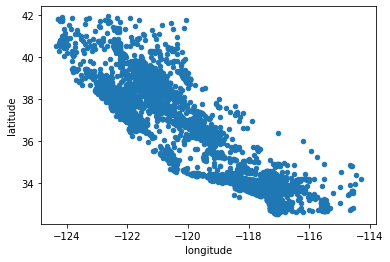

In [111]:
housing.plot(kind="scatter", x="longitude", y="latitude") 

Es difícil ver algún patrón en particular. Si se ajusta la opción alfa a 0,1, se puede visualizar donde hay alta densidad de puntos de datos:

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

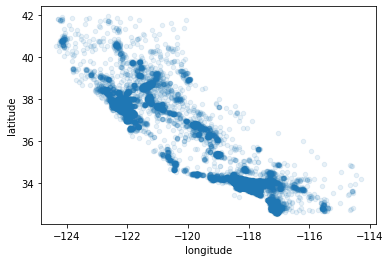

In [112]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Se pueden ver claramente que las zonas de alta densidad, son la zona de la bahía además de una larga línea de densidad bastante alta en el Valle Central.

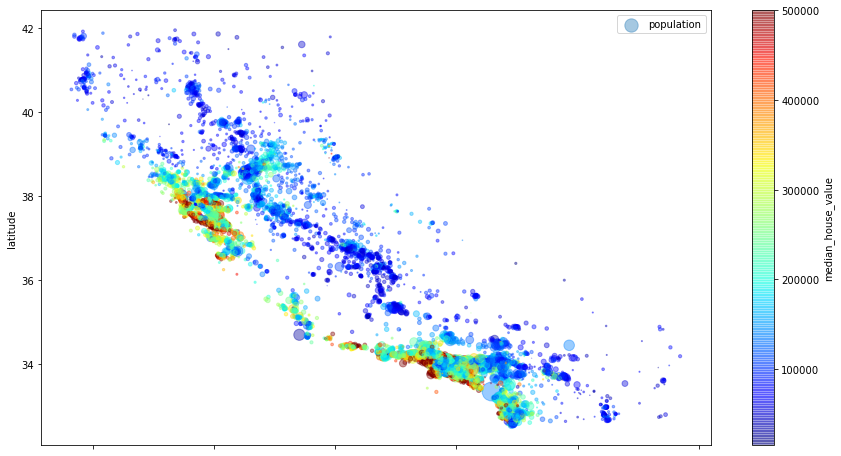

In [117]:
"""
El radio de cada círculo representa la población del distrito (opción s), 
El color representa el precio (opción c). 
Utilizaremos un mapa de colores predefinido (opción cmap) llamado jet, 
que va del azul (valores bajos) al rojo (precios altos):
"""

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(15,8),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
                                                                            
plt.legend()

Esta imagen indica que los precios de las viviendas están muy relacionados con la ubicación(por ejemplo, cerca del océano) y con la densidad de población como puede esperarse.Un algoritmo de agrupación debería ser útil para detectar el clúster principal. El atributo de proximidad al océano también puede ser útil, aunque en el norte de California los precios de la vivienda en los distritos costeros no son demasiado altos por lo que no es una regla sencilla.

### Buscando correlaciones 

Como el conjunto de datos no es demasiado grande, puede calcular fácilmente el coeficiente de correlación estándar (también llamado r de Pearson) entre cada par de atributos utilizando el método corr():

In [124]:
corr_matrix = housing.corr()
corr_matrix


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


<AxesSubplot:>

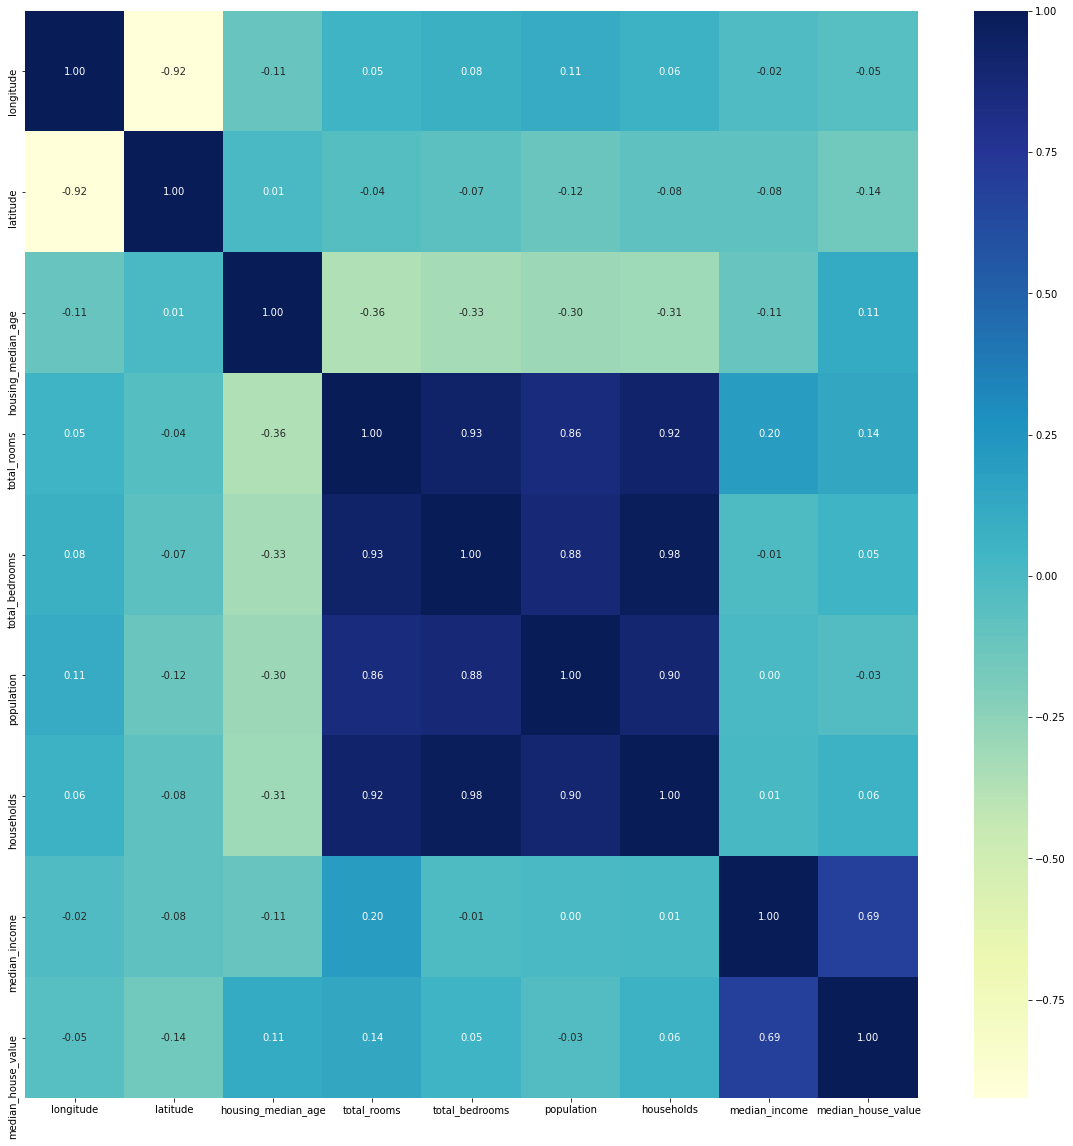

In [139]:
import seaborn as sns

fig, ax = plt.subplots(1, figsize=(20,20))  # 1 sólo gráfico, en un cuadrado
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap="YlGnBu")

En la ultima fila se ve como se correlaciona el valor medio de la vivienda con las demas variables.

In [145]:
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

El coeficiente de correlación oscila entre -1 y 1. Cuando se acerca a 1, significa que hay una fuerte correlación positiva; por ejemplo, el valor medio de la vivienda tiende a subir cuando sube la renta media. Cuando el coeficiente se acerca a -1, significa que hay una fuerte correlación negativa; se puede ver una pequeña correlación negativa entre la latitud y el valor medio de la vivienda (es decir, los precios tienen una ligera tendencia a bajar cuando se va al norte). Por último, los coeficientes cercanos a 0 significan que no hay correlación lineal. En la siguiente imagen muestra varios gráficos junto con el coeficiente de correlación entre sus ejes horizontal y vertical.
<img src="img/diagrama19_c2.png" height="900px" width="600px" />

**Tip**|
:----------------------------:|
El coeficiente de correlación sólo mide las correlaciones lineales ("si x sube, entonces y suele subir/bajar").Puede omitir por completo las relaciones no lineales (por ejemplo, "si x está cerca de 0, entonces y suele subir"). Ojo que pueden haber correlaciones 0 pese a que los ejes no sean claramente independientes y cuidado con pensar que la correlación tiene que ver con la pendiente, esta idea es equivocada. 

Otra forma de comprobar la correlación entre los atributos es utilizar la función pandas scatter_matrix(), que traza cada atributo numérico contra cada uno de los otros atributos numéricos. 

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

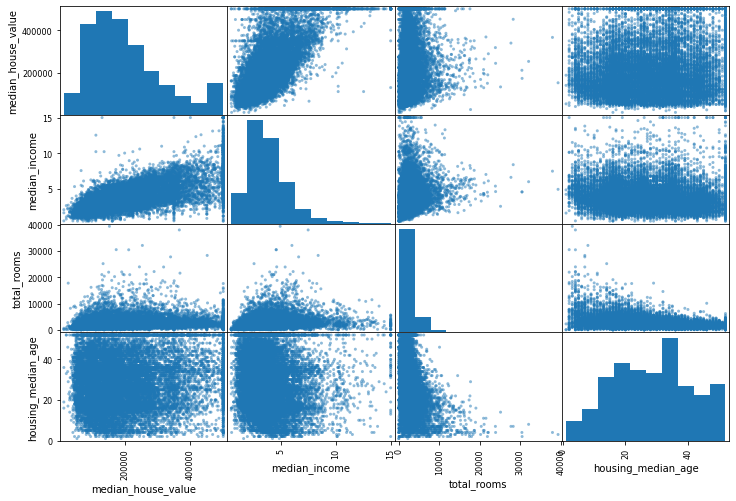

In [147]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

Los graficos que estan en la diagonal principal puede variar dependiendo de la configuración hay que **ver la documentación de pandas** para más detalles. El atributo más prometedor para predecir el valor medio de la vivienda es la mediana de los ingresos, así que vamos a ampliar su diagrama de dispersión de correlación:

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

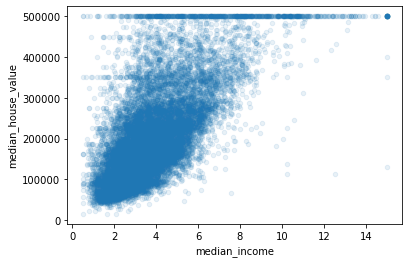

In [148]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

Este gráfico revela algunas cosas. En primer lugar, la correlación es realmente muy fuerte; se puede ver claramente la tendencia al alza, y los puntos no están demasiado dispersos. En segundo lugar, el tope de precios que hemos observado antes es claramente visible como una línea horizontal en 500.000. Pero este gráfico revela otras líneas rectas menos evidentes: una línea horizontal en torno a 450.000, otra en torno a 350.000, quizá una en torno a 280.000, y algunas más por debajo. Puede intentar eliminar los distritos correspondientes para evitar que sus algoritmos aprendan a reproducir estas peculiaridades de los datos.

### Experimentar con combinaciones de atributos

Esperamos que las secciones anteriores le hayan dado una idea de algunas formas de explorar los datos y obtener información. Las peculiaridades de los datos pueden ser tratadas despues (limpieza de datos). Una idea es hacer tranformaciones a ciertas relaciones como aplicar log() para las distribuciones **tail-heavy**(investigar).

Otra herramienta util en la preparación de los datos es la creacion de nuevos atributos, por ejemplo: el número total de habitaciones de un distrito no es muy útil si no se sabe cuántos hogares hay. Lo que realmente se quiere es el número de habitaciones por hogar. Del mismo modo, el número total de dormitorios por sí mismo no es muy útil: probablemente quiera compararlo con el número de habitaciones. Y la población por hogar también parece una combinación de atributos interesante. 

In [151]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


In [152]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

No está mal. El nuevo atributo rooms_per_household está mucho más correlacionado con el valor medio de la vivienda que el número total de habitaciones o dormitorios. Al parecer, las casas con una menor proporción de dormitorios por habitación tienden a ser más caras. El número de habitaciones por hogar también es más informativo que el número total de habitaciones de un distrito: evidentemente, cuanto más grandes son las casas, más caras son.

La **exploración no tiene que ser absolutamente exhaustiva**; la cuestión es empezar con buen pie y obtener rápidamente información que le ayude a conseguir un primer prototipo razonablemente bueno. Pero se trata de un **proceso iterativo**: una vez que tengas un prototipo en marcha, puedes analizar su resultado para obtener más información y volver a este paso de exploración.


# Preparar los datos para el aprendizaje automático Algoritmos 

Es recomendable hacer funciones para la preparacion de lo datos por los siguientes motivos:  

* Esto le permitirá reproducir estas transformaciones fácilmente en cualquier conjunto de datos (por ejemplo, la próxima vez que tenga un conjunto de datos nuevo).

* Poco a poco construirá una biblioteca de funciones de transformación que podrá reutilizar en futuros proyectos.

* Podrá utilizar estas funciones en su sistema en vivo para transformar los nuevos datos antes de alimentar sus algoritmos.

* Esto le permitirá probar fácilmente varias transformaciones y ver qué combinación de transformaciones funciona mejor.

Para una manipulacion más limpia copiamos los resultados de strat_train_set otra vez. Tambien dividimos el vector predictor(vector objetivo) de los datos 

In [194]:
#axis{0 or ‘index’, 1 or ‘columns’} queremos borrar una columna => 1
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


In [195]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.8+ MB


### Limpieza de datos.

La mayoría de los algoritmos de aprendizaje automático no pueden trabajar con características que faltan. Hemos visto antes que el atributo total_bedrooms tiene algunos valores que faltan. Tenemos tres opciones:

1. Deshacerse de los distritos correspondientes.
2. Deshacerse de todo el atributo.
3. Establecer los valores a algún valor (cero, la media, la mediana, etc.). 

Puede lograr esto fácilmente utilizando los métodos dropna(), drop() y fillna() de DataFrame:

In [196]:
#housing.dropna(subset=["total_bedrooms"]) # option 1
#housing.drop("total_bedrooms", axis=1) # option 2
#median = housing["total_bedrooms"].median() # option 3
#housing["total_bedrooms"].fillna(median, inplace=True)
#housing.info()

No olvides guardar el valor de la mediana que has calculado. Lo necesitará más tarde para reemplazar los valores que faltan en el conjunto de prueba cuando quiera evaluar su sistema, y también una vez que el sistema entre en funcionamiento para reemplazar los valores que faltan en los nuevos datos. 

Para ocuparse de los valores que faltan existe: SimpleImputer.  En primer lugar, debe crear una instancia de SimpleImputer, especificando que desea reemplazar los valores perdidos de cada atributo con la mediana de ese atributo:

In [197]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Como la mediana sólo puede calcularse sobre atributos numéricos, es necesario crear una copia de los datos sin el atributo de texto ocean_proximity:

In [198]:
housing_num = housing.drop("ocean_proximity", axis=1)

Ahora puedes ajustar la instancia de imputación a los datos de entrenamiento utilizando el método fit():

In [199]:
imputer.fit(housing_num)


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

El imputador ha calculado simplemente la mediana de cada atributo y ha almacenado el resultado en su variable de instancia statistics_. Sólo el atributo total_habitaciones tenía valores perdidos, pero no podemos estar seguros de que no habrá valores perdidos en los nuevos datos después de que el sistema entre en funcionamiento, así que es más seguro aplicar el imputador a todos los atributos numéricos:

In [201]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [202]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Aplicamos imputer.transform() para sustituir los valores faltantes por las medianas aprendidas:

In [203]:
X = imputer.transform(housing_num) #type numpy.array

Con X podemos hacer un dataframe de la siguiente manera: 

In [204]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [206]:
housing_tr.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.6 MB


DISEÑO DE SCIKIT-LEARN

La API de Scikit-Learn está notablemente bien diseñada. Estos son los principales principios de diseño:

ver libro pag 103


### Manejo de atributos de texto y categóricos

En este conjunto de datos, sólo hay un atributo que no es numerico: proximidad_del_océano. Veamos su valor para los 10 primeros casos:

In [214]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)


,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


Hay un número limitado de valores posibles, cada uno de los cuales representa una categoría. La mayoría de los algoritmos de aprendizaje automático prefieren trabajar con números, así que vamos a convertir estas categorías de texto a números. Para ello, podemos utilizar la clase OrdinalEncoder de Scikit-Learn:

In [215]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

Puede obtener la lista de categorías utilizando la variable de instancia categories_. 

In [216]:
ordinal_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Uno de los problemas de esta representación es que los algoritmos de ML asumirán que dos valores cercanos son más similares que dos valores distantes. Esto puede estar bien en algunos casos (por ejemplo, para categorías ordenadas como "malo", "medio", "bueno" y "excelente"), pero obviamente no es el caso de la columna ocean_proximity (por ejemplo, las categorías 0 y 4 son claramente más similares que las categorías 0 y 1). Para solucionar este problema, una solución común es crear un atributo binario por categoría: un atributo igual a 1 cuando la categoría es "<1H OCEAN" (y 0 en caso contrario), otro atributo igual a 1 cuando la categoría es "INLAND" (y 0 en caso contrario), y así sucesivamente. Esto se llama codificación de un solo atributo, porque sólo uno será igual a 1 (caliente), mientras que los otros serán 0 (frío). Los nuevos atributos se denominan a veces atributos ficticios. ScikitLearn proporciona una clase OneHotEncoder para convertir los valores categóricos en vectores one-hot:

In [223]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
#print(housing_cat_1hot)
housing_cat_1hot

  (0, 0)	1.0


O Utilizar toneladas de memoria principalmente para almacenar ceros sería un gran desperdicio, así que en su lugar una matriz dispersa sólo almacena la ubicación de los elementos no nulos. Puedes usarla mayormente como una matriz 2D normal, pero si realmente quieres convertirla en una matriz (densa) de NumPy, simplemente llama al método toarray():

In [220]:
housing_cat_1hot.toarray()
#que solución mas elegante
#cada posición corresponde a una categoria 
#solo se activa la que corresponde a la instancia 

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [221]:
cat_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**Tip**|
:----------------------------:|
pag 107 NO entendi muy bien pero se explica en el cap 13

### Transformadores personalizados.

Aunque Scikit-Learn proporciona muchos transformadores útiles, tendrá que escribir los suyos propios para tareas como las operaciones de limpieza personalizadas o la combinación de atributos específicos. Querrás que tu transformador trabaje sin problemas con las funcionalidades de Scikit-Learn (como las tuberías), y como Scikit-Learn se basa en la duck typing (no en la herencia), todo lo que necesitas hacer es crear una clase e implementar tres métodos: fit() (que devuelve self), transform(), y fit_transform(). 

Puedes obtener el último de forma gratuita simplemente añadiendo TransformerMixin como clase base. Si añades BaseEstimator como clase base (y evitas args y kargs en tu constructor), también obtendrás dos métodos extra (get_params() y set_params()) que serán útiles para el ajuste automático de hiperparámetros. 


Por ejemplo, aquí hay una pequeña clase transformadora que añade los atributos combinados que hemos discutido antes:

In [225]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self # nothing else to do
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, 
                         population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

En este ejemplo, el transformador tiene un hiperparámetro, add_bedrooms_per_room, establecido por defecto en True (a menudo es útil proporcionar valores por defecto sensibles). Este hiperparámetro le permitirá averiguar fácilmente si añadir este atributo ayuda a los algoritmos de aprendizaje automático o no. De forma más general, puede añadir un hiperparámetro para cerrar cualquier paso de preparación de datos del que no esté 100% seguro. Cuanto más automatice estos pasos de preparación de datos, más combinaciones podrá probar automáticamente, lo que hará mucho más probable que encuentre una gran combinación (y le ahorrará mucho tiempo).

**No entendi esta esta sseccion**

### Escalado de características 

Una de las transformaciones más importantes que debe aplicar a sus datos es el **escalado** de características. Con pocas excepciones, los algoritmos de aprendizaje automático **no funcionan bien cuando los atributos numéricos de entrada tienen escalas muy diferentes**. Este es el caso de los datos de la vivienda: el número total de habitaciones oscila entre aproximadamente 6 a 39.320, mientras que la mediana de los ingresos sólo oscila entre 0 y 15. Tenga en cuenta que generalmente no es necesario escalar los valores objetivo. Hay dos formas habituales de conseguir que todos los atributos tengan la misma escala: el escalado min-max y la estandarización.

El escalado **mínimo-máximo** (mucha gente lo llama **normalización**) es el más sencillo: los valores se desplazan y reescalan para que acaben oscilando entre 0 y 1. Hacemos esto restando el valor mínimo y dividiendo por el máximo menos el mínimo. ScikitLearn proporciona un transformador llamado **MinMaxScaler** para esto. Tiene un hiperparámetro feature_range que le permite cambiar el rango si, por alguna razón, no quiere 0-1.

La **estandarización es diferente**: primero se resta el valor medio (por lo que los valores estandarizados siempre tienen una media cero), y luego se divide por la desviación estándar para que la distribución resultante tenga una varianza unitaria. A diferencia del escalado min-max, **la estandarización no limita los valores a un rango específico**, lo que puede ser un problema para algunos algoritmos (por ejemplo, las redes neuronales suelen esperar un valor de entrada que oscila entre 0 y 1). Sin embargo, la estandarización **se ve mucho menos afectada por los valores atípicos**. Scikit-Learn proporciona un transformador llamado **StandardScaler** para la estandarización.



**Tip**|
:----------------------------:|
Como con todas las transformaciones, es importante **escalar sólo  los datos de entrenamiento, no  el conjunto de pruebas**. 

Transformación de Pipelines 

Hay muchos pasos de transformación de datos que necesitan ser ejecutados en el orden correcto. Scikit-Learn proporciona la clase Pipeline para ayudar con tales secuencias de transformaciones. Aquí hay una pequeña pipeline para los atributos numéricos:

In [226]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler())])

housing_num_tr = num_pipeline.fit_transform(housing_num) # numpy.array

El constructor Pipeline toma una lista de pares nombre/estimador que definen una secuencia de pasos. Todos los estimadores, excepto el último, deben ser transformadores (es decir, deben tener un método fit_transform()). Los nombres pueden ser cualquier cosa que desee (siempre que sean únicos y no contengan dobles guiones bajos, __ ); serán útiles más tarde para el ajuste de los hiperparámetros.

Cuando se llama al método fit() de pipeline, se llama a fit_transform() secuencialmente en todos los transformadores, pasando el resultado de cada llamada como parámetro a la siguiente llamada hasta que se llega al estimador final, para el que se llama al método fit().

El Pipeline muestra los mismos métodos que el estimador final. En este ejemplo, el último estimador es un StandardScaler, que es un transformador, por lo que el pipeline tiene un método transform() que aplica todas las transformaciones a los datos en secuencia (y por supuesto también un método fit_transform(), que es el que hemos utilizado).

Hasta ahora, hemos manejado las columnas categóricas y las columnas numéricas por separado. Sería más conveniente tener un único transformador capaz de manejar todas las columnas, aplicando las transformaciones apropiadas a cada columna. En la versión 0.20, Scikit-Learn introdujo el ColumnTransformer para este propósito, y la buena noticia es que funciona muy bien con pandas DataFrames. Vamos a utilizarlo para aplicar todas las transformaciones a los datos de la vivienda:

In [246]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)#da una lista con los nombres de las columnas 
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),
                                    ("cat", OneHotEncoder(), cat_attribs)])
housing_prepared = full_pipeline.fit_transform(housing)

In [247]:
#"rooms_per_household"
#"bedrooms_per_room" 
#"population_per_household"
print(len(num_attribs))
print(housing_prepared.shape)#¿por que da 16? , solo dios sabe, el problema esta en num_pipeline
print(housing.shape)

8
(16512, 16)
(16512, 9)


El constructor de ColumnTransformer requiere una lista de tuplas, donde cada tupla contiene un nombre, un transformador y una lista de nombres (o índices) de columnas a los que se debe aplicar el transformador.

Tenga en cuenta que el OneHotEncoder devuelve una matriz dispersa, mientras que el num_pipeline devuelve una matriz densa. Cuando hay una mezcla de matrices dispersas y densas, el transformador de columnas estima la densidad de la matriz final (es decir, la proporción de celdas no nulas), y devuelve una matriz dispersa si la densidad es inferior a un umbral determinado (por defecto, umbral_espeso=0,3). En este ejemplo, devuelve una matriz densa. Y ya está. Tenemos una tubería de preprocesamiento que toma los datos completos de la vivienda y aplica las transformaciones apropiadas a cada columna.

**Tip**|
:----------------------------:|
En lugar de utilizar un transformador, **puede especificar la cadena "drop" si quiere que las columnas se eliminen**, o puede especificar "passthrough" si quiere que las columnas no se toquen. Por defecto, las columnas restantes (es decir, las que no estaban en la lista) se eliminarán, pero puede establecer el hiperparámetro restante a cualquier transformador (o a "passthrough") si desea que estas columnas se manejen de manera diferente.

Si está utilizando Scikit-Learn 0.19 o anterior, ver pag 112